## This notebook will show the results of the different models that we used for the Project. The following are the regression models that we will do:
* Linear Regression
* KNeighbors
* Random Forest
* MLP
* Gradient Boosting

## We will also do comparison of the different results and conclude on which model is best to use

### Importing Required Libraries

In [174]:
import sys
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
%matplotlib inline
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Helper Functions and Preparation

In [175]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [176]:
complete_data = pd.read_csv('data/Complete_Data/All_Four_Datasets.csv')
complete_data['Date']=pd.to_datetime(complete_data['Date']).dt.date
complete_data.head()


,Date,Public Holidays,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,MONTH,...,February,January,July,June,March,May,November,October,September,Payday
0,2010-01-01,True,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,January,...,0,1,0,0,0,0,0,0,0,True
1,2010-01-02,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,January,...,0,1,0,0,0,0,0,0,0,False
2,2010-01-03,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,January,...,0,1,0,0,0,0,0,0,0,False
3,2010-01-04,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,January,...,0,1,0,0,0,0,0,0,0,False
4,2010-01-05,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,January,...,0,1,0,0,0,0,0,0,0,False


In [177]:
complete_data.isna().sum()

Date                          0
Public Holidays               0
School Holidays               0
labor force                   0
employment                    0
unemployment                  0
unemployment rate             0
Area                          0
DAY                           0
MONTH                         0
ARSON                         0
ASSAULT W/DANGEROUS WEAPON    0
BURGLARY                      0
HOMICIDE                      0
MOTOR VEHICLE THEFT           0
ROBBERY                       0
SEX ABUSE                     0
THEFT F/AUTO                  0
THEFT/OTHER                   0
TOTAL                         0
PRCP                          0
SNOW                          0
SNWD                          0
TMAX                          0
TMIN                          0
TOBS                          0
Friday                        0
Monday                        0
Saturday                      0
Sunday                        0
Thursday                      0
Tuesday 

### Set Predictors, Target Variable and Train-Test Split

In [178]:
predictors = ['Public Holidays','School Holidays','Payday','unemployment rate','PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 'April', 'August', 'December', 'February', 'January','July', 'June', 'March', 'May', 'November', 'October', 'September']
target = 'TOTAL'
X = complete_data[predictors]
y = complete_data[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

We will use the same variables and train test split for every model.

### Create lists to store performance metrics and parameters

In [179]:
model_names = []
model_params = []
train_r2_scores = []
test_r2_scores = []
train_mse_scores = []
test_mse_scores = []
train_rmse_scores = []
test_rmse_scores = []
train_mae_scores = []
test_mae_scores = []
train_mape_scores = []
test_mape_scores = []

We will record and report the parameters and error metrics (R-Squared, MSE, RMSE, MAE and MAPE) for both train and test data for every candidate model. Then provide comparison at the end of the notebook.

### Linear Regression Model

In [180]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
print("train scores: ", reg.score(x_train,y_train))
print("test scores: ", reg.score(x_test,y_test))

train scores:  0.39810459263596576
test scores:  0.3879816415467813


### Save Metrics for Linear Regression

In [182]:
y_pred = reg.predict(x_test)
MAE_L = metrics.mean_absolute_error(y_test, y_pred)
MSE_L = metrics.mean_squared_error(y_test, y_pred)
RMSE_L = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_L = metrics.r2_score(y_test, y_pred)

model_names.append("Linear Regression")
model_params.append("All Predictors")
test_mae_scores.append(MAE_L)
test_mse_scores.append(MSE_L)
test_rmse_scores.append(RMSE_L)
test_r2_scores.append(R2_L)
test_mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))

In [183]:
print('Mean Absolute Error:', MAE_L)
print('Mean Squared Error:', MSE_L)
print('Root Mean Squared Error:', RMSE_L)
print("r2 of MLPR is", R2_L)

Mean Absolute Error: 12.032404960335693
Mean Squared Error: 236.75630607949628
Root Mean Squared Error: 15.38688747211392
r2 of MLPR is 0.3879816415467813


In [184]:
y_pred = reg.predict(x_train)
MAE_L = metrics.mean_absolute_error(y_train, y_pred)
MSE_L = metrics.mean_squared_error(y_train, y_pred)
RMSE_L = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
R2_L = metrics.r2_score(y_train, y_pred)


train_mae_scores.append(MAE_L)
train_mse_scores.append(MSE_L)
train_rmse_scores.append(RMSE_L)
train_r2_scores.append(R2_L)
train_mape_scores.append(mean_absolute_percentage_error(y_train, y_pred))

Text(0.5,1,'Predited values vs Original values range')

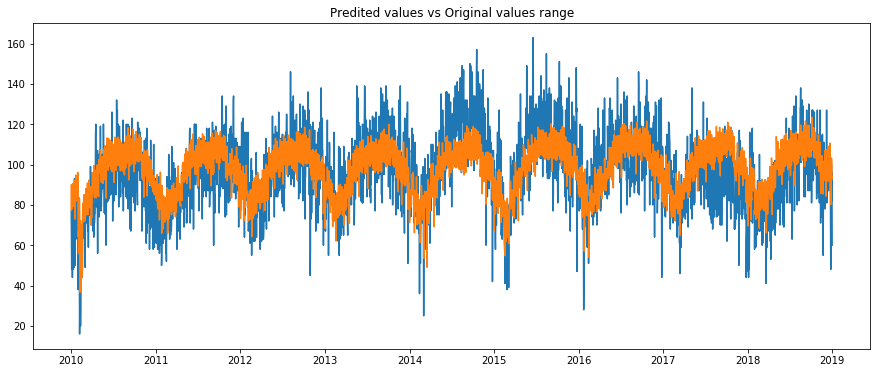

In [185]:
plt.figure(figsize=(15,6))
plt.plot(complete_data['Date'], complete_data['TOTAL'])
plt.plot(complete_data['Date'], reg.predict(complete_data[predictors]))
plt.title("Predited values vs Original values range")

In [186]:
print('Mean Absolute Error:', MAE_L)
print('Mean Squared Error:', MSE_L)
print('Root Mean Squared Error:', RMSE_L)
print("r2 is", R2_L)

Mean Absolute Error: 11.494486590581928
Mean Squared Error: 210.67319269601813
Root Mean Squared Error: 14.514585515818842
r2 is 0.39810459263596576


### Discussion
Linear regression provides fairly poor performance even with all variables considered at test R-Squared 0.398. We can see from the visualization of original vs fitted values, the model predicts the overall seasonal trend but does not match the actual values where they deviate from the basic trends such as the higher peaks in 2014 & 2015 and the lower peak in 2017. We will use this as a baseline to compare other models. There are no parameters to tune in this model.

### KNeighbors Regression Model

In [187]:
# Default number of neighbors is 5
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

mse_train = mean_squared_error(y_train, knr.predict(x_train))
mse_test = mean_squared_error(y_test, knr.predict(x_test))
rmse_train = math.sqrt(mean_squared_error(y_train, knr.predict(x_train)))
rmse_test = math.sqrt(mean_squared_error(y_test, knr.predict(x_test)))
rsequare_train = knr.score(x_train, y_train)
rsequare_test = knr.score(x_test, y_test)
mae_train = mean_absolute_error(y_train, knr.predict(x_train))
mae_test = mean_absolute_error(y_test, knr.predict(x_test))
mape_train = mean_absolute_percentage_error(y_train, knr.predict(x_train))
mape_test = mean_absolute_percentage_error(y_test, knr.predict(x_test))

print("MSE Train:", rmse_train)
print("MSE Test:", rmse_test)
print("R2 Train:", rsequare_train)
print("R2 Test:", rsequare_test)
print("MAE Train:", mae_train)
print("MAE Test:", mae_test)

MSE Train: 13.456710526612108
MSE Test: 16.599088120850766
R2 Train: 0.48264390126989143
R2 Test: 0.2877518082810482
MAE Train: 10.628223659186002
MAE Test: 13.350759878419451


In [188]:
# Running the model again with neighbors set to 3
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train, y_train)

Tmse_train = mean_squared_error(y_train, knr.predict(x_train))
Tmse_test = mean_squared_error(y_test, knr.predict(x_test))
Trmse_train = math.sqrt(mean_squared_error(y_train, knr.predict(x_train)))
Trmse_test = math.sqrt(mean_squared_error(y_test, knr.predict(x_test)))
Trsequare_train = knr.score(x_train, y_train)
Trsequare_test = knr.score(x_test, y_test)
Tmae_train = mean_absolute_error(y_train, knr.predict(x_train))
Tmae_test = mean_absolute_error(y_test, knr.predict(x_test))
Tmape_train = mean_absolute_percentage_error(y_train, knr.predict(x_train))
Tmape_test = mean_absolute_percentage_error(y_test, knr.predict(x_test))

print("MSE Train:", Tmse_train)
print("MSE Test:", Tmse_test)
print("RMSE Train:", Trmse_train)
print("RMSE Test:", Trmse_test)
print("R2 Train:", Trsequare_train)
print("R2 Test:", Trsequare_test)
print("MAE Train:", Tmae_train)
print("MAE Test:", Tmae_test)
print("MAPE Train:", Tmape_train)
print("MAPE Test:", Tmape_test)

MSE Train: 144.2527365707282
MSE Test: 310.7510976021614
RMSE Train: 12.01052607385406
RMSE Test: 17.628133695946413
R2 Train: 0.5878684965538274
R2 Test: 0.1967040718309242
MAE Train: 9.540509699505515
MAE Test: 14.214792299898681
MAPE Train: 10.752165056518274
MAPE Test: 15.651464586911459


In [189]:
# Running the model again with neighbors set to 4
knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train, y_train)

Fmse_train = mean_squared_error(y_train, knr.predict(x_train))
Fmse_test = mean_squared_error(y_test, knr.predict(x_test))
Frmse_train = math.sqrt(mean_squared_error(y_train, knr.predict(x_train)))
Frmse_test = math.sqrt(mean_squared_error(y_test, knr.predict(x_test)))
Frsequare_train = knr.score(x_train, y_train)
Frsequare_test = knr.score(x_test, y_test)
Fmae_train = mean_absolute_error(y_train, knr.predict(x_train))
Fmae_test = mean_absolute_error(y_test, knr.predict(x_test))
Fmape_train = mean_absolute_percentage_error(y_train, knr.predict(x_train))
Fmape_test = mean_absolute_percentage_error(y_test, knr.predict(x_test))

print("MSE Train:", Fmse_train)
print("MSE Test:", Fmse_test)
print("RMSE Train:", Frmse_train)
print("RMSE Test:", Frmse_test)
print("R2 Train:", Frsequare_train)
print("R2 Test:", Frsequare_test)
print("MAE Train:", Fmae_train)
print("MAE Test:", Fmae_test)
print("MAPE Train:", Fmape_train)
print("MAPE Test:", Fmape_test)

MSE Train: 166.10900057055915
MSE Test: 287.9470934650456
RMSE Train: 12.888328075066957
RMSE Test: 16.96900390314781
R2 Train: 0.5254249328745328
R2 Test: 0.2556527410734314
MAE Train: 10.19636744009129
MAE Test: 13.691869300911854
MAPE Train: 11.524950050012361
MAPE Test: 15.10165057022997


In [190]:
# Running the model again with neighbors set to 6
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(x_train, y_train)

Smse_train = mean_squared_error(y_train, knr.predict(x_train))
Smse_test = mean_squared_error(y_test, knr.predict(x_test))
Srmse_train = math.sqrt(mean_squared_error(y_train, knr.predict(x_train)))
Srmse_test = math.sqrt(mean_squared_error(y_test, knr.predict(x_test)))
Srsequare_train = knr.score(x_train, y_train)
Srsequare_test = knr.score(x_test, y_test)
Smae_train = mean_absolute_error(y_train, knr.predict(x_train))
Smae_test = mean_absolute_error(y_test, knr.predict(x_test))
Smape_train = mean_absolute_percentage_error(y_train, knr.predict(x_train))
Smape_test = mean_absolute_percentage_error(y_test, knr.predict(x_test))

print("MSE Train:", Smse_train)
print("MSE Test:", Smse_test)
print("RMSE Train:", Srmse_train)
print("RMSE Test:", Srmse_test)
print("R2 Train:", Srsequare_train)
print("R2 Test:", Srsequare_test)
print("MAE Train:", Smae_train)
print("MAE Test:", Smae_test)
print("MAPE Train:", Smape_train)
print("MAPE Test:", Smape_test)

MSE Train: 191.6380647478974
MSE Test: 273.6107311719014
RMSE Train: 13.843340086406076
RMSE Test: 16.54118288309217
R2 Train: 0.4524881425501319
R2 Test: 0.29271243786518064
MAE Train: 10.902054012932673
MAE Test: 13.336119554204659
MAPE Train: 12.403989611472948
MAPE Test: 14.70426824967698


In [191]:
# Running the model again with neighbors set to 7
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(x_train, y_train)

smse_train = mean_squared_error(y_train, knr.predict(x_train))
smse_test = mean_squared_error(y_test, knr.predict(x_test))
srmse_train = math.sqrt(mean_squared_error(y_train, knr.predict(x_train)))
srmse_test = math.sqrt(mean_squared_error(y_test, knr.predict(x_test)))
srsequare_train = knr.score(x_train, y_train)
srsequare_test = knr.score(x_test, y_test)
smae_train = mean_absolute_error(y_train, knr.predict(x_train))
smae_test = mean_absolute_error(y_test, knr.predict(x_test))
smape_train = mean_absolute_percentage_error(y_train, knr.predict(x_train))
smape_test = mean_absolute_percentage_error(y_test, knr.predict(x_test))

print("MSE Train:", smse_train)
print("MSE Test:", smse_test)
print("RMSE Train:", srmse_train)
print("RMSE Test:", srmse_test)
print("R2 Train:", srsequare_train)
print("R2 Test:", srsequare_test)
print("MAE Train:", smae_train)
print("MAE Test:", smae_test)
print("MAPE Train:", smape_train)
print("MAPE Test:", smape_test)

MSE Train: 200.37245480162395
MSE Test: 272.6842627628559
RMSE Train: 14.155297764498773
RMSE Test: 16.51315423421146
R2 Train: 0.4275339032746597
R2 Test: 0.2951073716443571
MAE Train: 11.159050154866053
MAE Test: 13.228397742075552
MAPE Train: 12.719404335818393
MAPE Test: 14.584228988800449


In [192]:
# Running a loop to get the R2 value if neighbors are set to 3,4,5,6,7
neighbors = [3, 4, 5, 6, 7]
train_scores = []
test_scores = []
for n in neighbors:
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(x_train, y_train)
    train_scores.append(knr.score(x_train, y_train))
    test_scores.append(knr.score(x_test, y_test))

Text(0,0.5,'R-Squared')

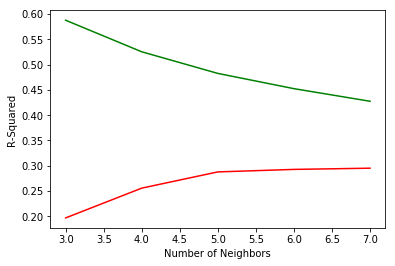

In [193]:
# Plotting the scores of the model
plt.plot(neighbors, train_scores, c='g')
plt.plot(neighbors, test_scores, c='r')
plt.xlabel("Number of Neighbors")
plt.ylabel("R-Squared")

Test accuracy score stops improving after 5 neighbours, we will proceed with 5.  R-Square values are all under 0.3.

Text(0.5,1,'Predited values vs Original values range')

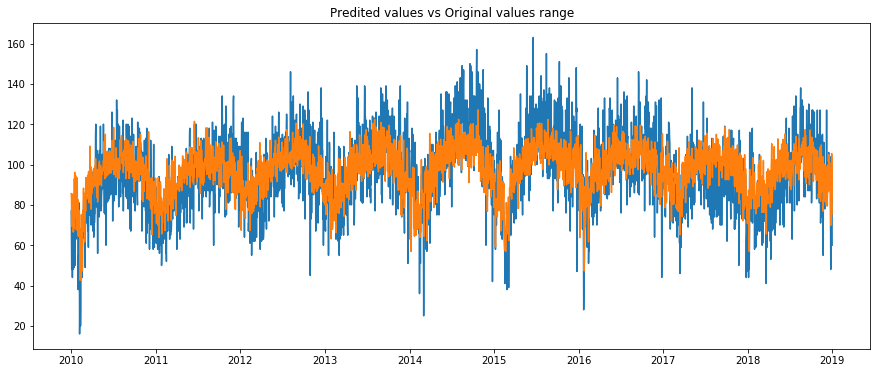

In [194]:
plt.figure(figsize=(15,6))
plt.plot(complete_data['Date'], complete_data['TOTAL'])
plt.plot(complete_data['Date'], knr.predict(complete_data[predictors]))
plt.title("Predited values vs Original values range")

### Save Metrics for Chosen K Neighbours Regressor (n = 5)

In [195]:
model_names.append("K Neighbours Regressor")
model_params.append("n = 5")
test_mae_scores.append(mae_test)
test_mse_scores.append(mse_test)
test_rmse_scores.append(rmse_test)
test_r2_scores.append(rsequare_test)
test_mape_scores.append(mape_test)
train_mae_scores.append(mae_train)
train_mse_scores.append(mse_train)
train_rmse_scores.append(rmse_train)
train_r2_scores.append(rsequare_train)
train_mape_scores.append(mape_train)

### Discussion

K-Neighbours Regression provides poor test accuracy at 0.29 R-Squared. The predicted vs actual values shows the model following the seasonal trend and responding in some way to deviations from the seasonal pattern but overall has a lower R-Squared than the linear regression model. Number of neighbours chosen was 5, there is very little improvement at higher values of this parameter.

### Random Forest

### Parameters that i am going to change will be max_estimators and max_depth 

#### 1) Firstly I'll look at Estimators ranging from 100 to 800 and consider the value that gives the best result.

#### 2) Secondly We try to change the depth values from 1 to 10 allong with the estimators Parametr set to the best value

#### In all the cases above we are keeping the random_state as Zero for all the models

In [196]:
est = [100, 200, 250, 256, 257, 300, 500, 800]
from sklearn import metrics
Train_Scores = []
Test_Scores = []
for i in est:
    regressor = RandomForestRegressor(n_estimators=i, max_depth=8, random_state=0)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("When Estimators are: ", i)
    print("Random Forest test  R2 scores: ", regressor.score(x_test, y_test))
    print("RF MSE for test data is",mean_squared_error(y_test, y_pred))
    print("RF RMSE for test data is",math.sqrt(mean_squared_error(y_test, y_pred)))
    print("RF MAE for test data is",mean_absolute_error(y_test, y_pred))
    print("RF MAPE for test data is",mean_absolute_percentage_error(y_test, y_pred))
    print("-----------------------------------------------------------------")
    Y_pred1 = regressor.predict(x_train)
    print("r2 for train data is",regressor.score(x_train, y_train))
    print("MSE for train data is",mean_squared_error(y_train, Y_pred1))
    print("RMSE for train data is",math.sqrt(mean_squared_error(y_train, Y_pred1)))
    print("MAE for train data is",mean_absolute_error(y_train, Y_pred1))
    print("MAPE for train data is",mean_absolute_percentage_error(y_train, Y_pred1))
    print("==================================================================")
    Train_Scores.append(regressor.score(x_train, y_train))
    Test_Scores.append(regressor.score(x_test, y_test))

When Estimators are:  100
Random Forest test  R2 scores:  0.44452912730123206
RF MSE for test data is 214.8811880207133
RF RMSE for test data is 14.658826283871205
RF MAE for test data is 11.604404482517669
RF MAPE for test data is 12.802057890503402
-----------------------------------------------------------------
r2 for train data is 0.592872336416386
MSE for train data is 142.50131114583334
RMSE for train data is 11.937391304042661
MAE for train data is 9.379395774843122
MAPE for train data is 10.331095120872389
When Estimators are:  200
Random Forest test  R2 scores:  0.45051389081301274
RF MSE for test data is 212.56601155216813
RF RMSE for test data is 14.579643738863036
RF MAE for test data is 11.544982133366437
RF MAPE for test data is 12.745499805091113
-----------------------------------------------------------------
r2 for train data is 0.5946545517131103
MSE for train data is 141.87750677377988
RMSE for train data is 11.911234477323493
MAE for train data is 9.35807488521687

#### From the metrices above we can see that with 257 estimators is having the better result, but there is some overfitting going on 

#### so, now i will be changing the Depth parameter

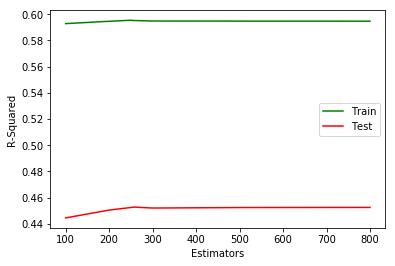

In [197]:
#plt.figure(figsize=(10,6))
plt.plot(est, Train_Scores, color ='green', label="Train")
plt.plot(est, Test_Scores, color ='Red', label ="Test")
plt.xlabel("Estimators")
plt.ylabel("R-Squared")
plt.legend()

In [198]:
Depth = [1,2,3,4,5,6,7,8,9,10]
from sklearn import metrics
Train_Scores = []
Test_Scores = []
for i in Depth:
    regressor = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = i)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("When Estimators are: ",257)
    print("Random Forest test  R2 scores: ", regressor.score(x_test, y_test))
    print("RF MSE for test data is",mean_squared_error(y_test, y_pred))
    print("RF RMSE for test data is",math.sqrt(mean_squared_error(y_test, y_pred)))
    print("RF MAE for test data is",mean_absolute_error(y_test, y_pred))
    print("RF MAPE for test data is",mean_absolute_percentage_error(y_test, y_pred))
    print("-----------------------------------------------------------------")
    Y_pred1 = regressor.predict(x_train)
    print("r2 for train data is",regressor.score(x_train, y_train))
    print("MSE for train data is",mean_squared_error(y_train, Y_pred1))
    print("RMSE for train data is",math.sqrt(mean_squared_error(y_train, Y_pred1)))
    print("MAE for train data is",mean_absolute_error(y_train, Y_pred1))
    print("MAPE for train data is",mean_absolute_percentage_error(y_train, Y_pred1))
    print("==================================================================")
    Train_Scores.append(regressor.score(x_train, y_train))
    Test_Scores.append(regressor.score(x_test, y_test))


When Estimators are:  257
Random Forest test  R2 scores:  0.1511672469329829
RF MSE for test data is 328.3667954068368
RF RMSE for test data is 18.12089389094359
RF MAE for test data is 14.419743116323735
RF MAPE for test data is 16.085698958126756
-----------------------------------------------------------------
r2 for train data is 0.171003692968957
MSE for train data is 290.16220525804636
RMSE for train data is 17.034148210522485
MAE for train data is 13.457617888725368
MAPE for train data is 15.504543443341367
When Estimators are:  257
Random Forest test  R2 scores:  0.21910756146098465
RF MSE for test data is 302.08441730598713
RF RMSE for test data is 17.38057586232364
RF MAE for test data is 13.833185473004255
RF MAPE for test data is 15.399536091584922
-----------------------------------------------------------------
r2 for train data is 0.25741095856043206
MSE for train data is 259.9182554096651
RMSE for train data is 16.121980505188098
MAE for train data is 12.752461582905791

#### With 257 estimators and depth as 8 we are getting the better result with no overfitting as we can see from the train and test scores of r2.

### Save metrics for the  choosen Random Forest Model (max_depth 8, n_estimators 257)

In [199]:
regressor = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 8)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
R2_S =  regressor.score(x_test, y_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("----------------------Train Parameters are stored-------------------------------------------")
Y_pred1 = regressor.predict(x_train)
R2_S1 = regressor.score(x_train, y_train)
MSE1 = mean_squared_error(y_train, Y_pred1)
RMSE1 = math.sqrt(mean_squared_error(y_train, Y_pred1))
MAE1 = mean_absolute_error(y_train, Y_pred1)
MAPE1 = mean_absolute_percentage_error(y_train, Y_pred1)
print("==================================================================")

model_names.append("Random Forest Regressor")
model_params.append("max depth 8, estimators 257")
test_mae_scores.append(MAE)
test_mse_scores.append(MSE)
test_rmse_scores.append(RMSE)
test_r2_scores.append(R2_S)
test_mape_scores.append(MAPE)
train_mae_scores.append(MAE1)
train_mse_scores.append(MSE1)
train_rmse_scores.append(RMSE1)
train_r2_scores.append(R2_S1)
train_mape_scores.append(MAPE1)

----------------------Train Parameters are stored-------------------------------------------


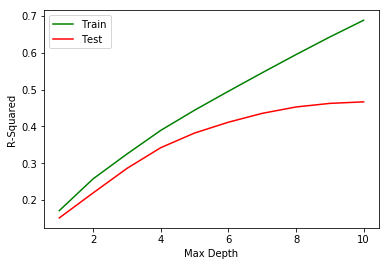

In [200]:
#plt.figure(figsize=(10,6))
plt.plot(Depth, Train_Scores, color ='green', label="Train")
plt.plot(Depth, Test_Scores, color ='Red', label ="Test")
plt.xlabel("Max Depth")
plt.ylabel("R-Squared")
plt.legend()

Random forest is doing a better job when there are 257 estimators and depth is 10. with those parameter values the R2 score is .49 for the test data, in order to overcome the overfitting the problem we are sticking with depth 8

Text(0.5,1,'Predited values vs Original values range')

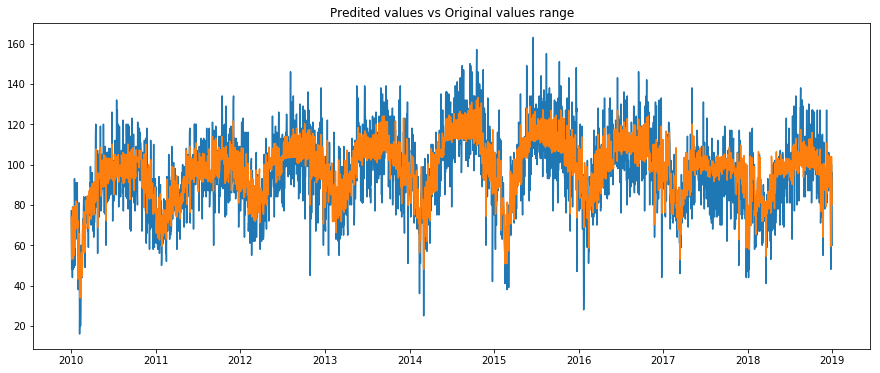

In [201]:
regressor = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
regressor.fit(x_train, y_train)
plt.figure(figsize=(15,6))
plt.plot(complete_data['Date'], complete_data['TOTAL'])
plt.plot(complete_data['Date'], regressor.predict(complete_data[predictors]))
plt.title("Predited values vs Original values range")

In [202]:
estimator = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
selector = RFE(estimator, 4, step=1)
selector = selector.fit(x_train, y_train)
y_predict = selector.predict(x_test)
print(selector.score(x_test, y_test))
print(selector.support_)
print(selector.ranking_)
col = x_test.columns
col[selector.support_]

0.340931001889636
[False False False  True  True False False  True  True False False False
 False False False False False False False False False False False False
 False False False False]
[ 7  8 14  1  1 22 10  1  1  2 16  5 12 13 19 21  4 24 15  6 20 23 25  3
 11 17  9 18]


Index(['unemployment rate', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [203]:
estimator = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x_train, y_train)
y_predict = selector.predict(x_test)
print(selector.score(x_test, y_test))
print(selector.support_)
print(selector.ranking_)
col = x_test.columns
col[selector.support_]

0.37076081096643854
[False False False  True  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False]
[ 6  7 13  1  1 21  9  1  1  1 15  4 11 12 18 20  3 23 14  5 19 22 24  2
 10 16  8 17]


Index(['unemployment rate', 'PRCP', 'TMAX', 'TMIN', 'Friday'], dtype='object')

RFE identifies the most valuable predictors as unemployment rate, precipitation (rainfall), max temperature, min temperature and Friday. From our exploratory anaylsis we could expect friday to be a significant predictor as there is significantly more crime on fridays. RFE indicates that weather data is also a valuable predictor.

### Gradient Boosting Regression Model

In [204]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
print(gbr.score(x_train, y_train))
print(gbr.score(x_test, y_test))

0.5604391984313601
0.4858287994266006


Using default parameters for GBR we get a 0.485 R-Squared on test so this model is promising.

Train score at  25  estimators : 0.42988906117532155
Test score at  25  estimators : 0.3793386928746447
Train score at  50  estimators : 0.5014826168961759
Test score at  50  estimators : 0.4420165965787797
Train score at  100  estimators : 0.5604391984313601
Test score at  100  estimators : 0.4858272995449874
Train score at  150  estimators : 0.590914537031566
Test score at  150  estimators : 0.4980505847005906
Train score at  200  estimators : 0.6159466792488435
Test score at  200  estimators : 0.5013661611410165
Train score at  500  estimators : 0.7032474008182646
Test score at  500  estimators : 0.4920289176820837


[Text(0,0,'25'),
 Text(0,0,'50'),
 Text(0,0,'100'),
 Text(0,0,'150'),
 Text(0,0,'200'),
 Text(0,0,'500')]

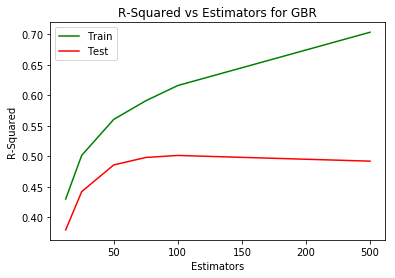

In [205]:
estimators = [25,50,100,150,200, 500]
train_scores = []
test_scores = []
for n in estimators: 
    gbr = GradientBoostingRegressor(n_estimators=n, random_state = 0)
    gbr.fit(x_train, y_train)
    print("Train score at ",n," estimators :", gbr.score(x_train, y_train))
    print("Test score at ",n," estimators :", gbr.score(x_test, y_test))
    train_scores.append(gbr.score(x_train, y_train))
    test_scores.append(gbr.score(x_test, y_test))

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.plot(estimators, train_scores,label="Train", color='g')
ax.plot(estimators, test_scores,label="Test", color='r')
plt.ylabel("R-Squared")
plt.xlabel("Estimators")
plt.title("R-Squared vs Estimators for GBR")
plt.legend()
ax.set_xticklabels(estimators)

There are diminishing returns in accuracy score for more than 100 estimators. Train and test scores diverge at this point so we will proceed at 100 estimators.

Train score at  2  max depth : 0.4904325178586567
Test score at  2  max depth : 0.4495225518460997
Train score at  3  max depth : 0.5604391984313601
Test score at  3  max depth : 0.4858272995449874
Train score at  4  max depth : 0.6297840897418876
Test score at  4  max depth : 0.4976407675049667
Train score at  5  max depth : 0.7021863075105764
Test score at  5  max depth : 0.4916408974709806
Train score at  6  max depth : 0.7761864398928879
Test score at  6  max depth : 0.4850449867330253


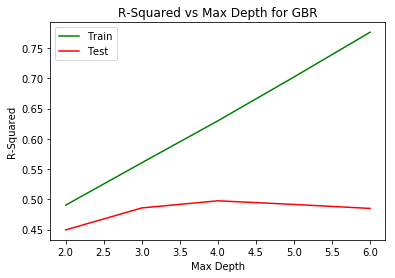

In [206]:
# MSE, MAE, MAPE, R2
depth = [2,3,4,5, 6]
train_scores = []
test_scores = []
for n in depth: 
    gbr = GradientBoostingRegressor(max_depth = n, random_state = 0)
    gbr.fit(x_train, y_train)
    print("Train score at ",n," max depth :", gbr.score(x_train, y_train))
    print("Test score at ",n," max depth :", gbr.score(x_test, y_test))
    train_scores.append(gbr.score(x_train, y_train))
    test_scores.append(gbr.score(x_test, y_test))


plt.plot(depth, train_scores,label = "Train", color='g')
plt.plot(depth, test_scores, label = "Test", color='r')
plt.ylabel("R-Squared")
plt.xlabel("Max Depth")
plt.title("R-Squared vs Max Depth for GBR")
plt.legend()

Best test score accuracy is at max depth 4. Using depths greater than 4 results in higher tresin scores but decreasing test scores due to overfitting. A max depth of 4 will be used.

### Saving Metrics for Chosen Gradient Boosting Regression (estimators 100, max depth 4)

In [207]:
gbr = GradientBoostingRegressor(n_estimators=100,max_depth=4, random_state = 0)
gbr.fit(x_train, y_train)
print("Showing scores for 4 max depth and 100 estimators estimators")
print("================================================================")
y_pred = gbr.predict(x_test)
print("Gradient boosting test  R2 scores: ", gbr.score(x_test, y_test))
print("RF MSE for test data is",mean_squared_error(y_test, y_pred))
print("RF RMSE for test data is",math.sqrt(mean_squared_error(y_test, y_pred)))
print("RF MAE for test data is",mean_absolute_error(y_test, y_pred))
print("RF MAPE for test data is",mean_absolute_percentage_error(y_test, y_pred))
print("-----------------------------------------------------------------")
Y_pred1 = gbr.predict(x_train)
print("r2 for train data is",gbr.score(x_train, y_train))
print("MSE for train data is",mean_squared_error(y_train, Y_pred1))
print("RMSE for train data is",math.sqrt(mean_squared_error(y_train, Y_pred1)))
print("MAE for train data is",mean_absolute_error(y_train, Y_pred1))
print("MAPE for train data is",mean_absolute_percentage_error(y_train, Y_pred1))
print("==================================================================")

model_names.append("Gradient Boosting Regressor")
model_params.append("max depth 4, estimators 100")
test_mae_scores.append(mean_absolute_error(y_test, y_pred))
test_mse_scores.append(mean_squared_error(y_test, y_pred))
test_rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred)))
test_r2_scores.append(gbr.score(x_test, y_test))
test_mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
train_mae_scores.append(mean_absolute_error(y_train, Y_pred1))
train_mse_scores.append(mean_squared_error(y_train, Y_pred1))
train_rmse_scores.append(math.sqrt(mean_squared_error(y_train, Y_pred1)))
train_r2_scores.append(gbr.score(x_train, y_train))
train_mape_scores.append(mean_absolute_percentage_error(y_train, Y_pred1))

Showing scores for 4 max depth and 100 estimators estimators
Gradient boosting test  R2 scores:  0.4976407675049667
RF MSE for test data is 194.3352099944338
RF RMSE for test data is 13.940416421127232
RF MAE for test data is 11.000262894484422
RF MAPE for test data is 12.054151269291298
-----------------------------------------------------------------
r2 for train data is 0.6297840897418876
MSE for train data is 129.5815964812088
RMSE for train data is 11.383391255737845
MAE for train data is 8.992760275690141
MAPE for train data is 9.962405952446524


Text(0.5,1,'Predited values vs Original values range')

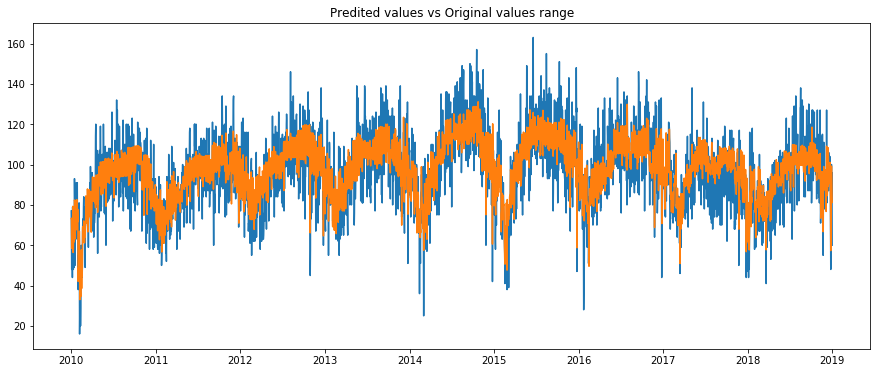

In [208]:
plt.figure(figsize=(15,6))
plt.plot(complete_data['Date'], complete_data['TOTAL'])
plt.plot(complete_data['Date'], gbr.predict(complete_data[predictors]))
plt.title("Predited values vs Original values range")

### Discussion 
Gradient Boosting Regression provides the highest R-Squared values so far at 0.498. We can see in the predicted vs actual values plot the model matching the seasonal trend and responding better than other models to non-seasonal deviations, particularly the very low values. The max depth of the ensemble weak-predictors was tuned to 4 and the number of estimators was set to 100.

### MLP Model

In [209]:
#Calculate the MAE, MSE, RMSE and R squared of the train and test by using MLP
MLP = nn.MLPRegressor(random_state = 0)
MLP.fit(x_train, y_train)

MAE_MLP_TRAIN = metrics.mean_absolute_error(y_train, MLP.predict(x_train))
MAE_MLP_TEST = metrics.mean_absolute_error(y_test, MLP.predict(x_test))


MSE_MLP_TRAIN = metrics.mean_squared_error(y_train, MLP.predict(x_train))
MSE_MLP_TEST = metrics.mean_squared_error(y_test, MLP.predict(x_test))


RMSE_MLP_TRAIN = np.sqrt(metrics.mean_squared_error(y_train, MLP.predict(x_train)))
RMSE_MLP_TEST = np.sqrt(metrics.mean_squared_error(y_test, MLP.predict(x_test)))

R2_MLP_TRAIN = metrics.r2_score(y_train, MLP.predict(x_train))
R2_MLP_TEST = metrics.r2_score(y_test, MLP.predict(x_test))

In [210]:
print('Mean Absolute Error of Train:', MAE_MLP_TRAIN)
print('Mean Absolute Error of Test:', MAE_MLP_TEST)

print('Mean Squared Error of Train:', MSE_MLP_TRAIN)
print('Mean Squared Error of Test:', MSE_MLP_TEST)

print('Root Mean Squared Error of Train:', RMSE_MLP_TRAIN)
print('Root Mean Squared Error of Test:', RMSE_MLP_TEST)

print("r2 of MLPR of Train is", R2_MLP_TRAIN)
print("r2 of MLPR of Test is", R2_MLP_TEST)

Mean Absolute Error of Train: 11.928415360531602
Mean Absolute Error of Test: 12.590847765577923
Mean Squared Error of Train: 227.94834346101968
Mean Squared Error of Test: 257.49759990198123
Root Mean Squared Error of Train: 15.097958254711783
Root Mean Squared Error of Test: 16.046731751418456
r2 of MLPR of Train is 0.34874931504268025
r2 of MLPR of Test is 0.3343651072814984


In [211]:
#Running a loop with the max_iter set are 200, 250, 300, 350, 400 and 450
max_iter = [200,250,300,350,400,450]
trainscore = []
testscore = []
for m in max_iter:
    MLP = nn.MLPRegressor(max_iter = m, random_state = 0)
    MLP.fit(x_train, y_train)
    trainscore.append(MLP.score(x_train,y_train))
    testscore.append(MLP.score(x_test,y_test)) 

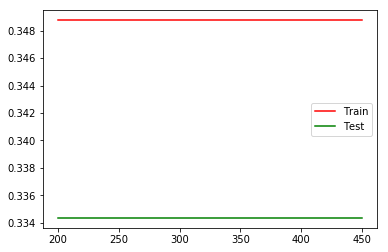

In [212]:
#Plotting scores by using the MLP model with the iteration function
plt.plot(max_iter, trainscore, c = 'red', label ="Train")
plt.plot(max_iter, testscore, c = 'green', label = "Test")
plt.legend()

No improvements from increasing the iterations.

In [213]:
#Running a loop with the layer_sizes set are 200, 250, 300, 350, 400 and 450
layer_sizes = [150, 200, 250, 300, 350, 400, 450]
trainscore = []
testscore = []
for s in layer_sizes:
    MLP = nn.MLPRegressor(hidden_layer_sizes  = (s,),random_state = 0)
    MLP.fit(x_train, y_train)
    trainscore.append(MLP.score(x_train,y_train))
    testscore.append(MLP.score(x_test,y_test)) 

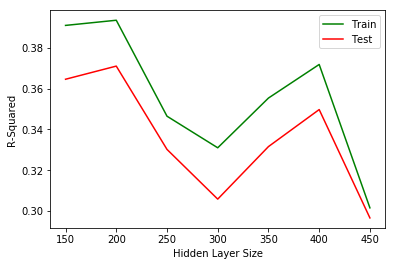

In [214]:
#Plotting scores by using the MLP model with the layer_size function
plt.plot(layer_sizes, trainscore, c = 'g', label ="Train")
plt.plot(layer_sizes, testscore, c = 'r', label = "Test")
plt.xlabel("Hidden Layer Size")
plt.ylabel("R-Squared")
plt.legend()

Performance drops after 200 layers. Hidden layers of 200 will be used.

### Saving metrics for chosen MLP regressor (iterations 350, layers 200)

In [215]:
model_names.append("Multi-layer Perceptror Regressor")
model_params.append("iterations 350, layers 200")
MLP = nn.MLPRegressor(max_iter = 350,hidden_layer_sizes  = (200,),random_state = 0)
MLP.fit(x_train, y_train)
y_pred_train = MLP.predict(x_train)
y_pred_test = MLP.predict(x_test)
test_mae_scores.append(mean_absolute_error(y_test, y_pred_test))
test_mse_scores.append(mean_squared_error(y_test, y_pred_test))
test_rmse_scores.append(math.sqrt(mean_squared_error(y_test, y_pred_test)))
test_r2_scores.append(MLP.score(x_test, y_test))
test_mape_scores.append(mean_absolute_percentage_error(y_test, y_pred_test))
train_mae_scores.append(mean_absolute_error(y_train, y_pred_train))
train_mse_scores.append(mean_squared_error(y_train, y_pred_train))
train_rmse_scores.append(math.sqrt(mean_squared_error(y_train, y_pred_train)))
train_r2_scores.append(MLP.score(x_train, y_train))
train_mape_scores.append(mean_absolute_percentage_error(y_train, y_pred_train))

Text(0.5,1,'Predited values vs Original values range')

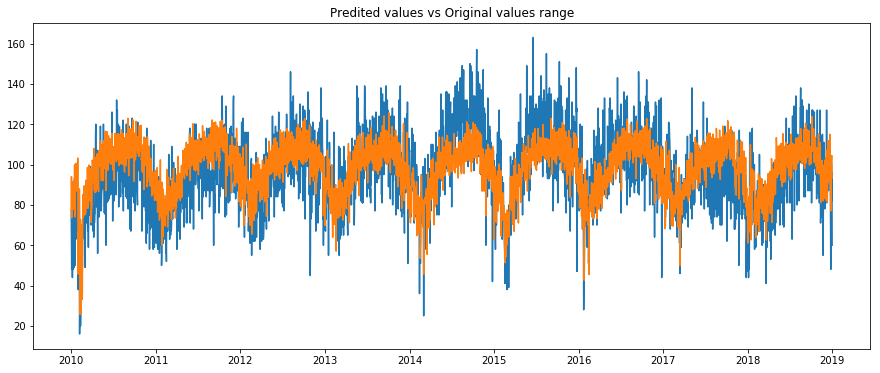

In [216]:
plt.figure(figsize=(15,6))
plt.plot(complete_data['Date'], complete_data['TOTAL'])
plt.plot(complete_data['Date'], MLP.predict(complete_data[predictors]))
plt.title("Predited values vs Original values range")

### Discussion
The Multilayer Perceptron model provides fairly low accuracy with a test R-Squared around .365. The predicted vs actual values plot shows that the MLP regressor is not accurately capturing the high peaks in 2014 and 2015. Tuning max iterations had no effect in the chosen random state, the model converged quickly. Accuracy decreased when hidden layers was increased past 200 so this was chosen.

### Comparison of models. Table of error metrics

In [217]:


Comparison = {"Model" : model_names,
              "Parameters": model_params,
              "Train R-Squared": train_r2_scores,
              "Train MAE": train_mae_scores,
              "Train MSE": train_mse_scores,
              "Train RMSE": train_rmse_scores,
              "Train MAPE": train_mape_scores,
              "Test R-Squared": test_r2_scores,
              "Test MAE": test_mae_scores,
              "Test MSE": test_mse_scores,
              "Test RMSE": test_rmse_scores,
              "Test MAPE": test_mape_scores}

Comparison_Table = pd.DataFrame(data = Comparison)


Comparison_Table

,Model,Parameters,Train R-Squared,Train MAE,Train MSE,Train RMSE,Train MAPE,Test R-Squared,Test MAE,Test MSE,Test RMSE,Test MAPE
0,Linear Regression,All Predictors,0.398105,11.494487,210.673193,14.514586,12.999450,0.387982,12.032405,236.756306,15.386887,13.169888
1,K Neighbours Regressor,n = 5,0.482644,10.628224,181.083058,13.456711,12.085747,0.287752,13.350760,275.529726,16.599088,14.753711
2,Random Forest Regressor,"max depth 8, estimators 257",0.595243,9.356005,141.671382,11.902579,10.320488,0.452801,11.520161,211.681233,14.549269,12.717489
3,Gradient Boosting Regressor,"max depth 4, estimators 100",0.629784,8.992760,129.581596,11.383391,9.962406,0.497641,11.000263,194.335210,13.940416,12.054151
4,Multi-layer Perceptror Regressor,"iterations 350, layers 200",0.393545,11.552291,212.269171,14.569460,13.096167,0.371064,12.375512,243.300900,15.598106,13.573663


### Line Charts of each model test and train data

Text(0,0.5,'MSE')

<Figure size 1080x432 with 0 Axes>

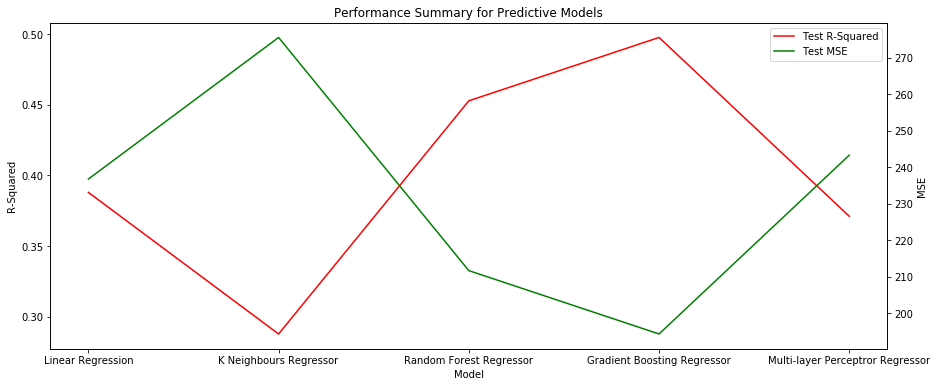

In [218]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

l1 = ax.plot(Comparison_Table['Model'], Comparison_Table['Test R-Squared'], c = 'red', label='Test R-Squared')
plt.ylabel("R-Squared")
plt.xlabel("Model")
plt.title("Performance Summary for Predictive Models")
ax2 = ax.twinx() 
l2 = ax2.plot(Comparison_Table['Model'], Comparison_Table['Test MSE'], c = 'green', label='Test MSE')
#ax.legend([l2],['Test MSE'], loc=0)
lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.ylabel("MSE")


Random forest and gradient boosting models provide the best performance at .453 and .498 R-Squared respectively. A higher R-Squared value would be ideal but given the complex and unpredictable nature of the problem, these models have some value.